# LAB 149

1. Uruchom poniższy fragment kodu, aby przygotować dane do rysowania wykresu (wszystkie zastosowane polecenia powinny Ci już być na tym etapie znane):
     * import pandas as pd
     * import numpy as np
     * import matplotlib as plt
     * %matplotlib inline
     * marathon = pd.read_csv("./marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
     * marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
     * marathon.head(5)
2. Wyświetl wykres punktowy prezentujący zależność wieku (kolumna Age) od czasu potrzebnego do przebiegnięcia maratonu (kolumna TotalSeconds)
3. Korzystając z data frame marathon utwórz dwa nowe obiekty data frame: marathon_m z wynikami mężczyzn (w kolumnie M/F znajduje się wartość M) oraz marathin_w z wynikami kobiet (w kolumnie M/F znajduje się F)
4. Korzystając z data frame marathon_m i marathon_w utwórz wykres punktowy nakładając na wyniki mężczyzn wyniki kobiet. Odpowiedz na pytanie "czy wśród osób po 70-ce chętniej biegają panowie czy panie".
5. Korzystając z data frame marathon_m i marathon_w utwórz dwa oddzielne wykresy typu hexbin. Poeksperymentuj z parametrem gridsize
6. Wykonaj poniższe polecenia importujące dane do kolejnego wykresu:
 import datetime
 #Import data
 nasa = pd.read_csv("nasa_facebook_statuses.csv",
 usecols=["status_published","num_likes"])
 #Convert column type to date time
 nasa["status_published"] = pd.to_datetime(nasa["status_published"])
 #Select observations between two datetimes - May 2015
 filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_publis
hed'] < '2016-6-1')
 nasa = nasa[filter]
 #Add column with day only
 nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1
)
 #Group all columns by sum
 nasa_by_day = nasa.groupby(by='day').sum()
 #Import data
 bean = pd.read_csv("mrbean_facebook_statuses.csv",
 usecols=["status_published","num_likes"])
 #Convert column type to date time
 bean["status_published"] = pd.to_datetime(bean["status_published"])
 #Select observations between two datetimes - May 2015
 filter =(bean['status_published'] >= '2016-5-1') & (bean['status_publis

## Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

marathon = pd.read_csv("./marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


## Exercise 2

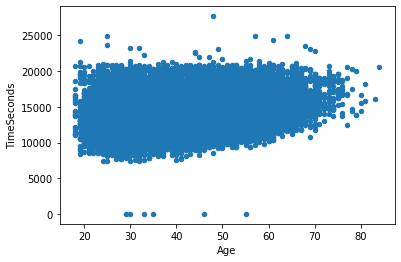

In [2]:
marathon.plot(kind="scatter", x="Age", y="TimeSeconds")

## Exercise 3

In [3]:
is_man = marathon["M/F"] == "M"
marathon_m = marathon[is_man]
marathon_m.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


## Exercise 4

In [4]:
marathon_w = marathon[~ is_man]
marathon_w.head(5)

,Age,M/F,Country,40K,TimeSeconds
20,37,F,KEN,2:14:43,8083.0
23,27,F,BRN,2:15:42,8142.0
24,25,F,USA,2:15:54,8154.0
33,33,F,USA,2:17:25,8245.0
43,33,F,KEN,2:19:07,8347.0


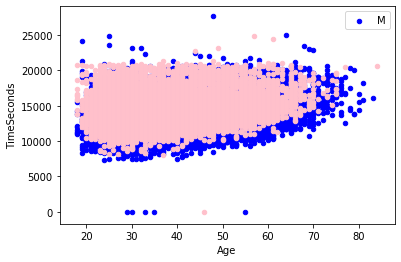

In [5]:
ax = marathon_m.plot.scatter(x="Age",y="TimeSeconds",color="Blue",label="M")
marathon_w.plot.scatter(x="Age",y="TimeSeconds",color="Pink",ax=ax)

## Exercise 5

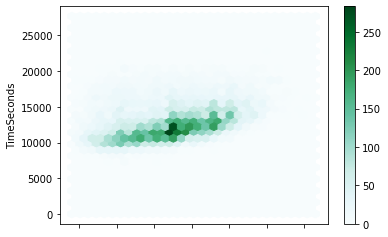

In [6]:
marathon_m.plot.hexbin(x="Age",y="TimeSeconds",gridsize=30)

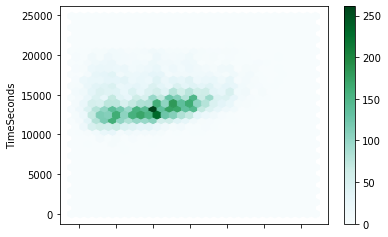

In [7]:
marathon_w.plot.hexbin(x="Age",y="TimeSeconds",gridsize=30)

## Exercise 6